## t-SNE 군집화
#### 필요한 패키지를 불러온다:

In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#### 데이터를 불러온다:

In [24]:
os.chdir(r"D:\python_ML\python_ml_basic\data")

In [25]:
# df = pd.read_csv('data_KOSPI200_en.csv', header='infer',encoding='ISO-8859-1')
df = pd.read_csv('data_male_physical_measurements.csv', header='infer',encoding='latin1')

In [10]:
df.shape

(252, 8)

In [11]:
df.head(5)

,Body_Fat,Density,Weight,BMI,Fat_Free_Weight,Chest,Thigh,Forearm
0,12.6,1.0708,154.3,23.7,134.9,93.1,59.0,27.4
1,6.9,1.0853,173.3,23.4,161.3,93.6,58.7,28.9
2,24.6,1.0414,154.0,24.7,116.0,95.8,59.6,25.2
3,10.9,1.0751,184.8,24.9,164.7,101.8,60.1,29.4
4,27.8,1.0340,184.3,25.6,133.1,97.3,63.2,27.7


In [12]:
header = df.columns

#### Kmeans로 3개의 클러스터를 만들어 둔다:

In [13]:
X=np.array(df)
kmeans = KMeans(n_clusters=3)
result = kmeans.fit(X).labels_
mycolor = []
for i in result:
    if i == 0:
        mycolor.append('red')
    elif i == 1:
        mycolor.append('green')
    else:
        mycolor.append('blue')   

#### 군집의 시각화의 어려움을 보여준다:

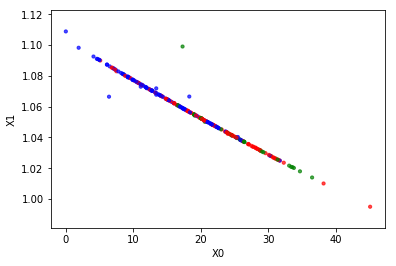

In [14]:
plt.scatter(X[:,0],X[0:,1],marker="o",alpha=0.7, s=10,c=mycolor)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

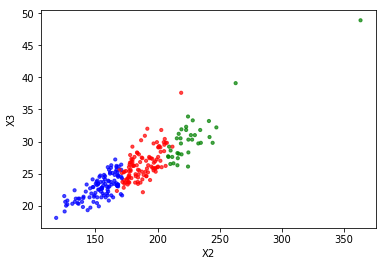

In [15]:
plt.scatter(X[:,2],X[0:,3],marker="o",alpha=0.7, s=10,c=mycolor)
plt.xlabel("X2")
plt.ylabel("X3")
plt.show()

#### PCA를 활용한 최적 시각화:

In [16]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

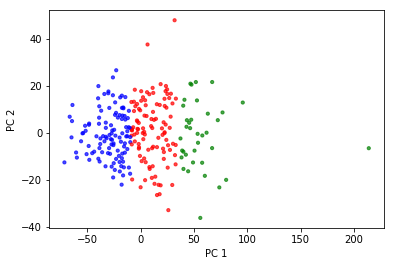

In [17]:
plt.scatter(X_pca[:,0],X_pca[0:,1],marker="o",alpha=0.7, s=10,c=mycolor)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

#### 이제는 t-SNE를 적용해서 군집화 결과를 보여준다:

In [22]:
tsne = TSNE(n_components=2, random_state=2)
result = tsne.fit_transform(X)

In [ ]:
plt.scatter(result[:,0],result[0:,1],marker="o",alpha=0.7, s=10,c=mycolor)
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.show()